In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor

In [3]:
df = pd.read_csv("housing.csv")
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [12]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [5]:
X = df.drop('MEDV',axis=1)
y = df['MEDV']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
model = KNeighborsRegressor(n_neighbors=5)
weights=['uniform', 'distance']
algorithm=['ball_tree', 'kd_tree', 'brute']
p = [1,2]

params = {'weights':weights,'algorithm':algorithm,'p':p}
params

{'weights': ['uniform', 'distance'],
 'algorithm': ['ball_tree', 'kd_tree', 'brute'],
 'p': [1, 2]}

In [8]:
gridsearch = GridSearchCV(estimator=model,param_grid=params)
gridsearch.fit(X_train_scaled,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [9]:
gridsearch.best_estimator_

KNeighborsRegressor(algorithm='ball_tree', p=1, weights='distance')

In [10]:
y_pred = gridsearch.predict(X_test_scaled)

In [11]:
from sklearn.metrics import mean_squared_error,root_mean_squared_error,mean_absolute_error
mse = mean_squared_error(y_test,y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print(mse)
print(rmse)
print(mae)

4509432736.361224
67152.30998529555
51073.22619368623


Since StandardDeviation is 165k and rmse is 67k . I think the model is ok

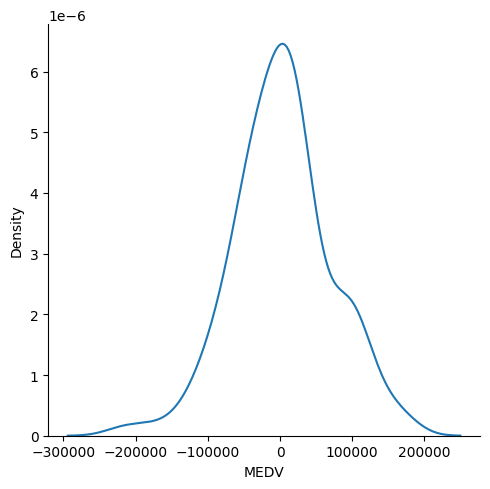

In [13]:
residuals = y_pred-y_test
sns.displot(residuals,kind='kde')

When Regression problem check if the residuals graph is a normal distribution. the graph is somewhat like normal
distribution with slightly towards right . but i think the model is ok for now